# Function 4 - Soil ML Model Development

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Define the path to the dataset
dataset_path = "../../DataPreprocessing/Dataset/soil_dataset.csv"

# Load the dataset into a Pandas DataFrame
soil_df = pd.read_csv(dataset_path)

print("Initial Dataset Information:")
print(soil_df.info())

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   2309 non-null   object 
 1   Latitude                    2309 non-null   float64
 2   Longitude                   2309 non-null   float64
 3   Location                    2309 non-null   object 
 4   Elvation                    2183 non-null   object 
 5   Soil_pH                     2309 non-null   float64
 6   Soil_moisture               2309 non-null   object 
 7   Soil_Condition              2309 non-null   object 
 8   Treatment(pH)/Ton/per/acr)  2301 non-null   object 
 9   Unnamed: 9                  0 non-null      float64
 10  Unnamed: 10                 0 non-null      float64
 11  Unnamed: 11                 1 non-null      float64
 12  Unnamed: 12                 0 non-null      float64
 13  Unna

In [13]:
# Drop unnamed columns
unnamed_columns = [col for col in soil_df.columns if 'Unnamed' in col]
soil_df = soil_df.drop(columns=unnamed_columns, axis=1)

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Latitude', 'Longitude', 'Location', 'Elvation', 'Treatment(pH)/Ton/per/acr)']
soil_df = soil_df.drop(columns=columns_to_drop, axis=1)

# Remove '%' sign from 'Soil_moisture' and convert to numeric
soil_df['Soil_moisture'] = soil_df['Soil_moisture'].str.rstrip('%').astype('float') / 100.0

soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soil_pH         2309 non-null   float64
 1   Soil_moisture   2309 non-null   float64
 2   Soil_Condition  2309 non-null   object 
dtypes: float64(2), object(1)
memory usage: 71.9+ KB


In [14]:
soil_df.isnull().sum()

Soil_pH           754
Soil_moisture     754
Soil_Condition    754
dtype: int64

In [15]:
# Drop rows with null values
soil_df = soil_df.dropna()

In [16]:
soil_df.isnull().sum()

Soil_pH           0
Soil_moisture     0
Soil_Condition    0
dtype: int64

In [17]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 0 to 2308
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soil_pH         2309 non-null   float64
 1   Soil_moisture   2309 non-null   float64
 2   Soil_Condition  2309 non-null   object 
dtypes: float64(2), object(1)
memory usage: 72.2+ KB


In [18]:
# Create a mapping dictionary
soil_condition_mapping = {'Bad': 0, 'Good': 1}

# Apply the mapping to the 'Soil_Condition' column
soil_df['Soil_Condition'] = soil_df['Soil_Condition'].map(soil_condition_mapping)

In [19]:
soil_df.head()

,Soil_pH,Soil_moisture,Soil_Condition
0,4.8,0.78,0
1,6.1,0.50,1
2,7.3,0.81,0
3,5.9,0.85,0
4,3.3,0.83,0


## Model Development - Random Forest

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import metrics

# Separate features (X) and target variable (y)
X = soil_df.drop('Soil_Condition', axis=1)
y = soil_df['Soil_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

Model Accuracy: 99.57

Confusion Matrix:
[[135   1]
 [  0  95]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       136
           1       0.99      1.00      0.99        95

    accuracy                           1.00       231
   macro avg       0.99      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



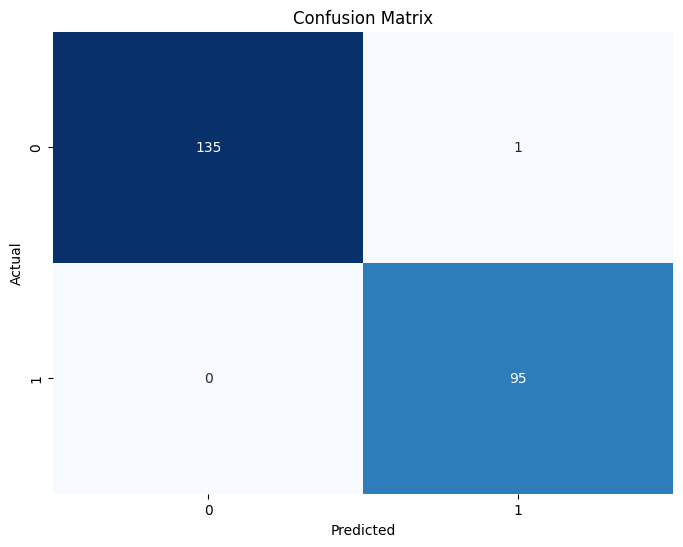

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
import pickle

# Specify the path where you want to save the model
model_path_pickle = 'soil_rf_model.pkl'

# Save the trained Random Forest model to a file using pickle
with open(model_path_pickle, 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print(f"Model saved to: {model_path_pickle}")

Model saved to: soil_rf_model.pkl
